# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, \
    f1_score, roc_curve, RocCurveDisplay

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

In [3]:
np.shape(X)

(70000, 784)

In [4]:
X[1,:].reshape((28,28)).shape

(28, 28)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=42)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

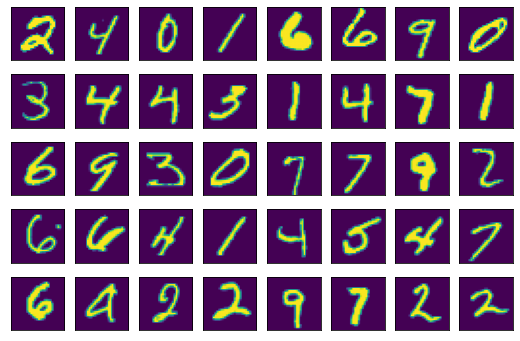

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=8, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for idx, ax in enumerate(axs.flat):
    ax.imshow(X_train[idx,:].reshape((28,28)))

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.
___
### Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred_gaussian = clf_gaussian.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred_gaussian)

0.5604

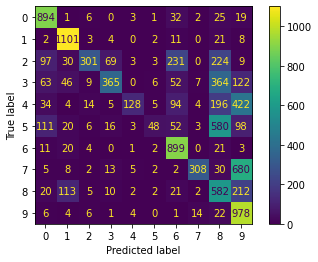

In [10]:
cm_gaussian = confusion_matrix(y_test, y_pred_gaussian, labels=clf_gaussian.classes_)
disp_gaussian = ConfusionMatrixDisplay(confusion_matrix=cm_gaussian,
                              display_labels=clf_gaussian.classes_)
disp_gaussian.plot()

___
### Simple linear model

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf_sgdc = make_pipeline(StandardScaler(), SGDClassifier(loss='log', n_jobs=-1))
clf_sgdc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log', n_jobs=-1))])

In [12]:
y_pred_sgdc = clf_sgdc.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred_sgdc)

0.9035

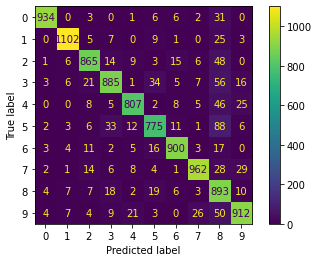

In [14]:
cm_sgdc = confusion_matrix(y_test, y_pred_sgdc, labels=clf_sgdc.classes_)
disp_sgdc = ConfusionMatrixDisplay(confusion_matrix=cm_sgdc,
                              display_labels=clf_sgdc.classes_)
disp_sgdc.plot()

___
### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [16]:
from sklearn.metrics import accuracy_score
y_pred_rf = clf_rf.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred_rf)

0.9669

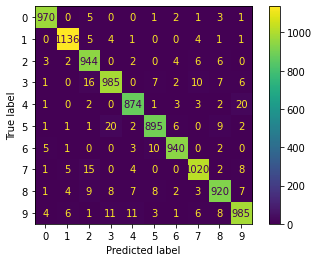

In [18]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=clf_rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=clf_rf.classes_)
disp_rf.plot()

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [19]:
print(f'Accuracy Naive Bayes: {accuracy_score(y_test, y_pred_gaussian)}')
print(f'Accuracy Simple linear model: {accuracy_score(y_test, y_pred_sgdc)}')
print(f'Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf)}')

Accuracy Naive Bayes: 0.5604
Accuracy Simple linear model: 0.9035
Accuracy Random Forest: 0.9669


In [20]:
print(f'F1 Naive Bayes: {f1_score(y_test, y_pred_gaussian, average="micro")}')
print(f'F1 Simple linear model: {f1_score(y_test, y_pred_sgdc, average="micro")}')
print(f'F1 Random Forest: {f1_score(y_test, y_pred_rf, average="micro")}')

F1 Naive Bayes: 0.5604
F1 Simple linear model: 0.9035
F1 Random Forest: 0.9669


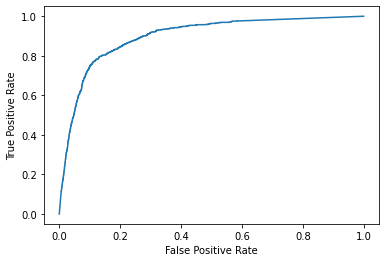

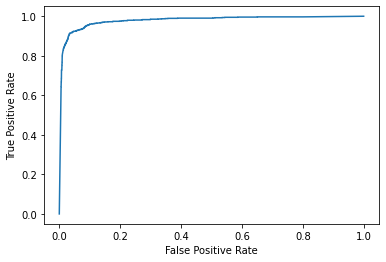

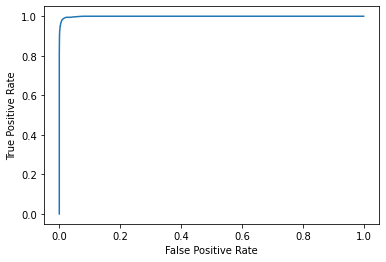

In [21]:
binary_5 = (lambda x : x == '5')(y_test)

def plot_roc(p):
    fpr, tpr, _ = roc_curve(binary_5, p)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

prob_gaussian = clf_gaussian.predict_proba(X_test)[:, 5]
prob_sgdc = clf_sgdc.predict_proba(X_test)[:, 5]
prob_rf = clf_rf.predict_proba(X_test)[:, 5]

plot_roc(prob_gaussian)
plot_roc(prob_sgdc)
plot_roc(prob_rf)